In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io as ski

<h3>Defining PCA class</h3>



In [5]:
class PCA1:

    def __init__(self, n_pcs):
        self.n_pcs = n_pcs
        self.components = None
        self.eigenvalues=None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean #centering mean
        
        cov_matrix= sum([x.reshape(-1,1) @ x.reshape(1,-1) for x in X])/len(X)

        #         calculating eigenvectors and eigenvalues
        eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
        eigenvectors = eigenvectors.T

        # sorting eigenvectors according to their eigenvalues
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]
        self.components = eigenvectors[:self.n_pcs]
        self.eigenvalues=eigenvalues

#Method to transform original data to new space(PCs)
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)
    
#Method to transform the transformed data back to original space
    def inverse_transform(self,X):
        X_rev_transformed = np.dot(X, self.components)
        X_rev_transformed =X_rev_transformed +self.mean
        return X_rev_transformed
    
   #Method to get the varience explained by each PC
    def explained_variance(self):
        return self.eigenvalues/np.sum(self.eigenvalues)

<h3>Loading the images/data</h3>



In [7]:
# images=os.listdir("train/train/")
images=[]
for i in range(50):
    images.append(ski.imread(f'train/train/Img_{i}.png',as_gray=True)[:,:256])
images=np.array(images)

<h3>Performing pca</h3>



In [29]:
pca1=PCA1(15) #Top 20 components.
pca1.fit(images[0])

In [30]:
out1=pca1.transform(images[0])
out1=pca1.inverse_transform(out1)

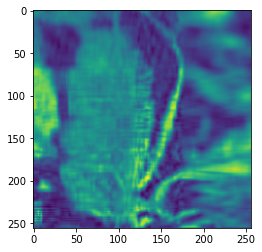

In [31]:
plt.imshow(out1)

<BarContainer object of 256 artists>

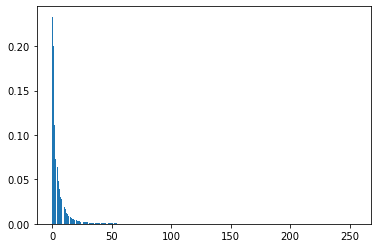

In [51]:
#plot showing the varience explained by each PC
plt.bar(range(len(pca.explained_variance())),height=pca.explained_variance())

In [42]:
# function to get the number of PC's required to explain the varience(95%)
def get_n_components(data,cut_off):
    pca=PCA1(data.shape[1])
    pca.fit(data)
    var=pca.explained_variance()
    for i in range(len(var)):
        temp=np.sum(var[:i])
        if(temp>=cut_off):
            return i

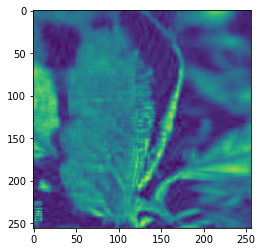

In [44]:
pca=PCA1(get_n_components(images[0],0.95))
pca.fit(images[0])
out=pca.transform(images[0])
out=pca.inverse_transform(out)
plt.imshow(out)

<h3>Entire code at one place</h3>



In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage as ski
import pandas as pd

class PCA1:

    def __init__(self, n_pcs):
        self.n_pcs = n_pcs
        self.components = None
        self.eigenvalues=None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean #centering mean
        
        cov_matrix= sum([x.reshape(-1,1) @ x.reshape(1,-1) for x in X])/len(X)

        #         calculating eigenvectors and eigenvalues
        eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
        eigenvectors = eigenvectors.T

        # sorting eigenvectors
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[index]
        eigenvectors = eigenvectors[index]
        self.components = eigenvectors[:self.n_pcs]
        self.eigenvalues=eigenvalues

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)
    
    def inverse_transform(self,X):
        X_rev_transformed = np.dot(X, self.components)
        X_rev_transformed =X_rev_transformed +self.mean
        return X_rev_transformed
    
    def explained_variance(self):
        return self.eigenvalues/np.sum(self.eigenvalues)
    
    # function to get the number of PC's required to explain the varience(95%)
def get_n_components(data,cut_off):
    pca=PCA1(data.shape[1])
    pca.fit(data)
    var=pca.explained_variance()
    for i in range(len(var)):
        temp=np.sum(var[:i])
        if(temp>=cut_off):
            return i

#PCA for all images
pcs=[]
for i in range(919):
    image=ski.io.imread(f'C:/Users/ksrma/Documents/courses/mlds/mlds-assignment-2/train/train/Img_{i}.png',as_gray=True)[:,:256]
    pcs.append(get_n_components(image,0.95))
    pca=PCA1(pcs[i])
    pca.fit(image)
    temp=pca.transform(image)
    temp=pca.inverse_transform(temp)
    plt.imsave(f'C:/Users/ksrma/Documents/courses/mlds/mlds-assignment-2/train/train_pca/Img_{i}.png',temp)
df=pd.DataFrame({"N_PC's":pcs})
df.to_csv("pc_components.csv")

<h3>End</h3>

